In [103]:
import pandas as pd
import numpy as np

In [104]:
encodings=['utf-8','latin1','ISO-8859-1','cp1252']

file_path='spam.csv'

for encoding in encodings:
  try:
    df=pd.read_csv(file_path,encoding=encoding)
    break
  except UnicodeDecodeError:
    continue

if 'df' in locals():
  print("success")
else:
  print("failed")




success


In [105]:
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2549,ham,Yup but not studying surfing lor. I'm in e laz...,NaN,NaN,NaN
1719,ham,Then u better go sleep.. Dun disturb u liao.. ...,NaN,NaN,NaN
2540,ham,"They said if its gonna snow, it will start aro...",NaN,NaN,NaN
5292,spam,Urgent! Please call 09061213237 from landline....,NaN,NaN,NaN
2083,ham,"you are sweet as well, princess. Please tell m...",NaN,NaN,NaN


In [106]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [107]:
df.shape

(5572, 5)

**data** **cleaning**

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [109]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [110]:
df.sample(5)

,v1,v2
2989,ham,"Love isn't a decision, it's a feeling. If we c..."
16,ham,Oh k...i'm watching here:)
1644,ham,India have to take lead:)
2284,ham,"Velly good, yes please!"
4497,spam,Latest Nokia Mobile or iPOD MP3 Player +å£400 ...


In [111]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [112]:
df.sample(5)

,target,text
1426,ham,Ok...
944,ham,I sent my scores to sophas and i had to do sec...
2304,ham,Friendship poem: Dear O Dear U R Not Near But ...
2553,ham,ÌÏ give me some time to walk there.
3543,ham,Lol ok ill try to send. Be warned Sprint is de...


In [113]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [114]:
df['target']=encoder.fit_transform(df['target'])

In [115]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [116]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [117]:
df.duplicated().sum()

403

In [118]:
#remove duplicates

In [119]:
df=df.drop_duplicates(keep='first')

In [120]:
df.duplicated().sum()

0

In [121]:
df.shape

(5169, 2)

EDA

In [122]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [123]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

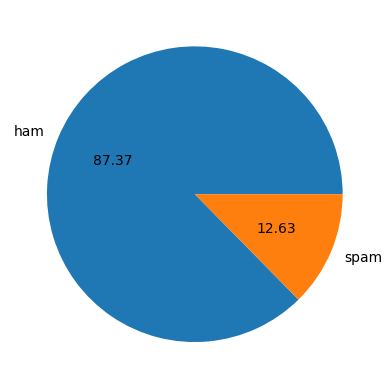

In [124]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

more ham and less spam values not balanced

In [125]:
pip install nltk


In [126]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [127]:
import nltk

In [128]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\savio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [129]:
df['num_characters']=df['text'].apply(len)

In [130]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [131]:
#number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [132]:
df.head()


,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [133]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [134]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [135]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [136]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [137]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [138]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

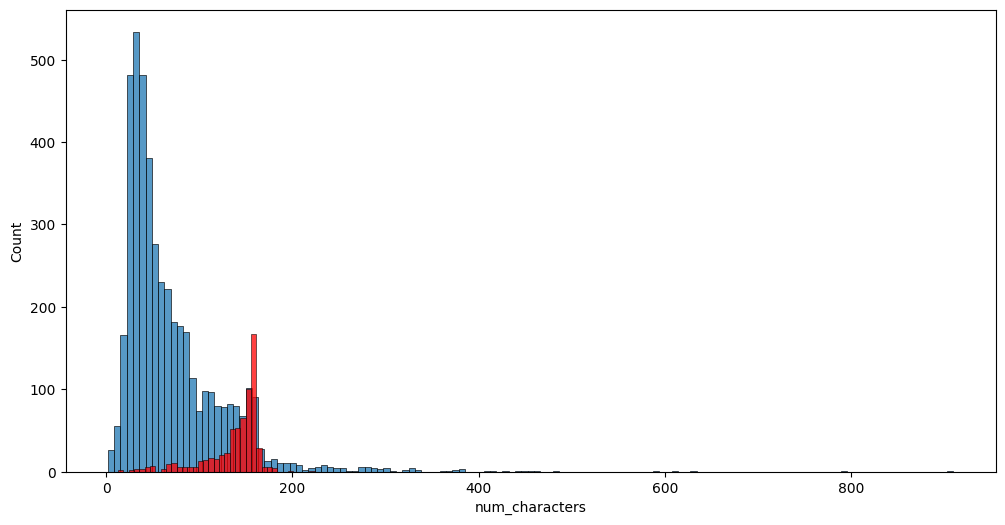

In [139]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

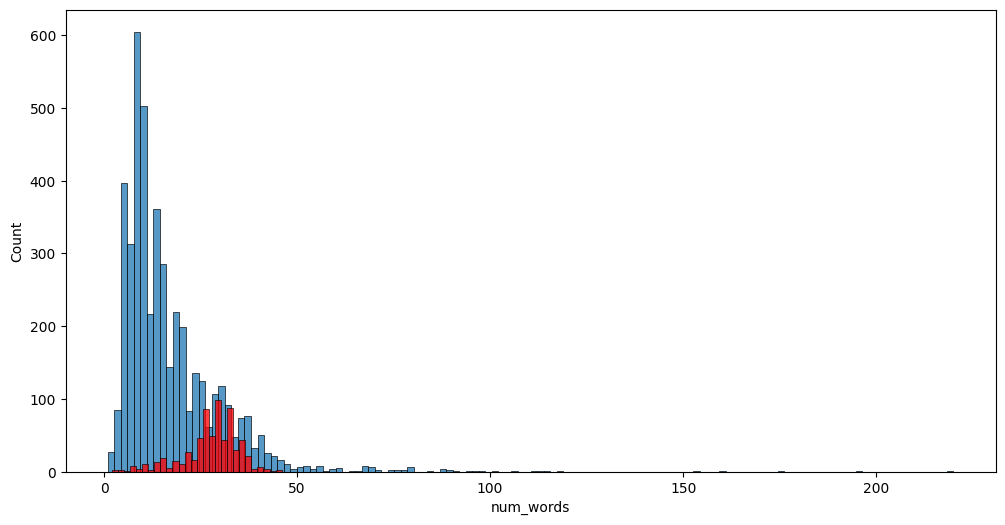

In [140]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

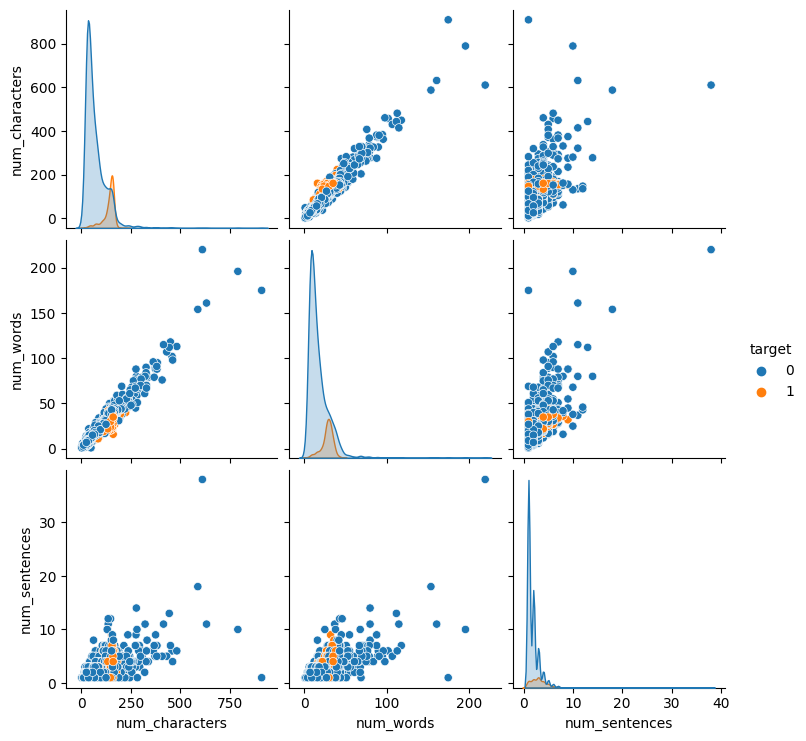

In [141]:
sns.pairplot(df,hue='target')

target             int32
text              object
num_characters     int64
num_words          int64
num_sentences      int64
dtype: object
target            0
num_characters    0
num_words         0
num_sentences     0
dtype: int64


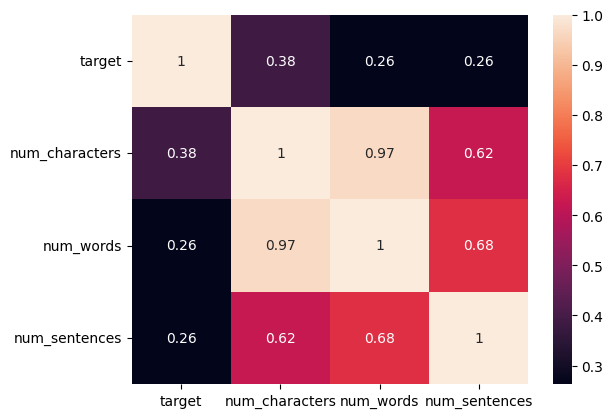

In [142]:


# Inspect your DataFrame for non-numeric columns
print(df.dtypes)

# Select only the numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Check for missing values
print(numeric_df.isnull().sum())

# Handle missing values (optional)
numeric_df = numeric_df.dropna()  # or numeric_df.fillna(0)

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()


**data** **preprocessing**

In [143]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')
ps=PorterStemmer()

def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]

  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\savio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [144]:
 transformed_text=transform_text("I'am gonna be  home soon. and i don't want to talk?")

print(transformed_text)

gon na home soon want talk


In [145]:
ps.stem('loving')

'love'

In [146]:
df['transformed_text']=df['text'].apply(transform_text)

df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [147]:
pip install wordcloud

In [148]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [149]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

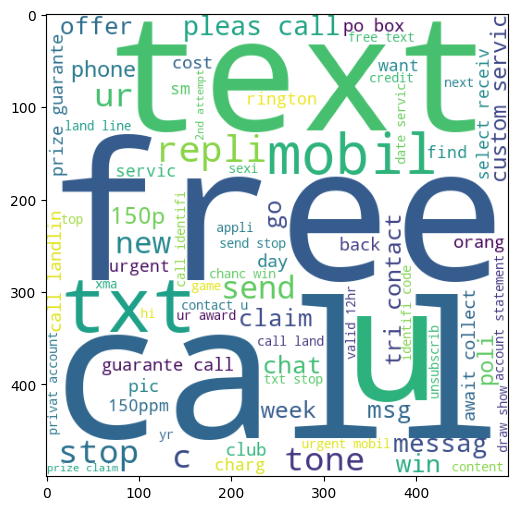

In [150]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)


In [151]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

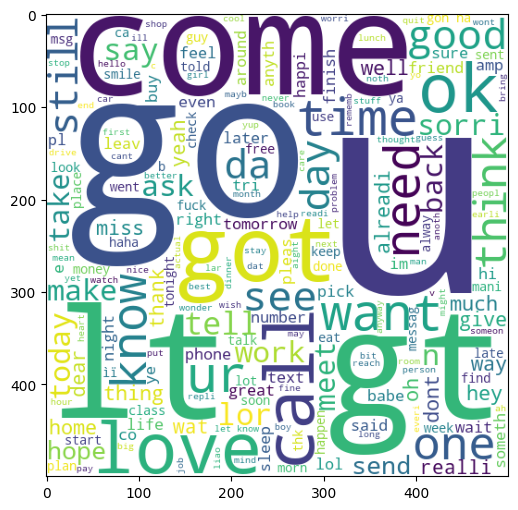

In [152]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [153]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [154]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].to_list():
  for word in msg.split():
    spam_corpus.append(word)

In [155]:
len(spam_corpus)

9939

In [156]:
from collections import Counter


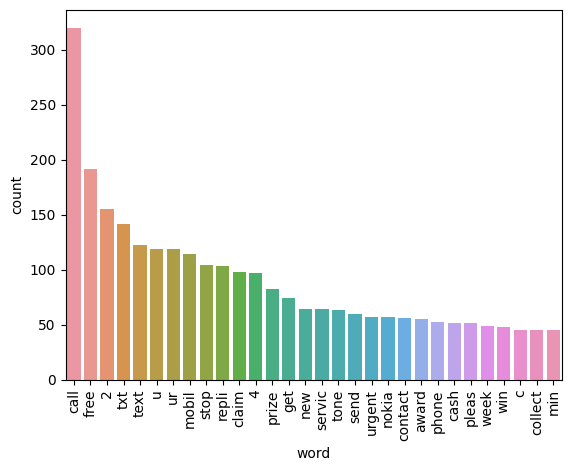

In [157]:
most_common_30 = Counter(spam_corpus).most_common(30)

# Create a DataFrame from the most common elements
df_common_30 = pd.DataFrame(most_common_30, columns=['word', 'count'])

# Create a bar plot using Seaborn
sns.barplot(data=df_common_30, x='word', y='count')
plt.xticks(rotation='vertical')
plt.show()

In [158]:
df.head()


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


building a model

In [159]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [160]:
X=tfidf.fit_transform(df['transformed_text']).toarray()


In [161]:
X.shape

(5169, 3000)

In [162]:
y=df['target'].values

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [165]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [166]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [167]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [193]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [194]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [170]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [171]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

In [172]:
svc = SVC (kernel='sigmoid', gamma=1.0)

knc = KNeighborsClassifier()

mnb = MultinomialNB()

dtc = DecisionTreeClassifier(max_depth=5)

lrc = LogisticRegression (solver='liblinear', penalty='l1')

rfc = RandomForestClassifier(n_estimators=50, random_state=2)

abc = AdaBoostClassifier(n_estimators=50, random_state=2)

bc = BaggingClassifier(n_estimators=50, random_state=2)

etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)

xgb = XGBClassifier(n_estimators=50, random_state=2)

In [173]:
clfs = {

'SVC': svc,

'KN': knc,

'NB': mnb,

'DT': dtc,

'LR': lrc,

'RF': rfc,

'AdaBoost': abc,

'BgC': bc,

'ETC': etc,

'GBDT':gbdt,

'xgb':xgb

}

In [174]:
def train_classifier(clf,X_train,X_test,y_train,y_test):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred)

  return accuracy,precision

In [175]:
train_classifier(svc,X_train,X_test,y_train,y_test)

(0.9758220502901354, 0.9747899159663865)

In [176]:
acc_score=[]
prec_scores=[]

for name,clf in clfs.items():
  curr_acc,curr_prec=train_classifier(clf,X_train,X_test,y_train,y_test)

  print("For",name)
  print("accuracy",curr_acc)
  print("precison",curr_prec)

  acc_score.append(curr_acc)
  prec_scores.append(curr_prec)

For SVC
accuracy 0.9758220502901354
precison 0.9747899159663865
For KN
accuracy 0.9052224371373307
precison 1.0
For NB
accuracy 0.9709864603481625
precison 1.0
For DT
accuracy 0.9303675048355899
precison 0.8367346938775511
For LR
accuracy 0.9584139264990329
precison 0.9702970297029703
For RF
accuracy 0.9758220502901354
precison 0.9829059829059829
For AdaBoost
accuracy 0.960348162475822
precison 0.9292035398230089
For BgC
accuracy 0.9584139264990329
precison 0.8682170542635659
For ETC
accuracy 0.9748549323017408
precison 0.9745762711864406
For GBDT
accuracy 0.9468085106382979
precison 0.9191919191919192
For xgb
accuracy 0.9671179883945842
precison 0.9262295081967213


In [177]:
performance_df=pd.DataFrame({"Algorithm":clfs.keys(),"accuracy":acc_score,"precision":prec_scores}).sort_values('precision',ascending=False)

In [178]:
performance_df

,Algorithm,accuracy,precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


In [179]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [180]:
performance_df1

,Algorithm,variable,value
0,KN,accuracy,0.905222
1,NB,accuracy,0.970986
2,RF,accuracy,0.975822
3,SVC,accuracy,0.975822
4,ETC,accuracy,0.974855
5,LR,accuracy,0.958414
6,AdaBoost,accuracy,0.960348
7,xgb,accuracy,0.967118
8,GBDT,accuracy,0.946809
9,BgC,accuracy,0.958414


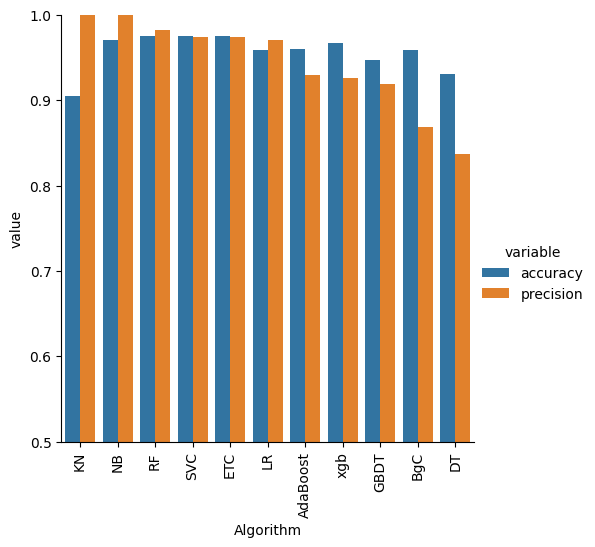

In [181]:
sns.catplot(x="Algorithm",y='value',hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [182]:
#voting classifier
svc=SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

from sklearn.ensemble import VotingClassifier


In [183]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [184]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [185]:
y_pred=voting.predict(X_test)
print("accuracy",accuracy_score(y_test,y_pred))
print("precison",precision_score(y_test,y_pred))



accuracy 0.9816247582205029
precison 0.9917355371900827


In [186]:
#applying stacking
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [187]:
from sklearn.ensemble import StackingClassifier
clf=StackingClassifier(estimators=estimators,final_estimator=final_estimator)


In [188]:
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("accuracy",accuracy_score(y_test,y_pred))
print("precison",precision_score(y_test,y_pred))


accuracy 0.9796905222437138
precison 0.9398496240601504


In [189]:
import pickle
pickle.dump(tfidf,open('vectorizers.pkl','wb'))
pickle.dump(mnb,open('models.pkl','wb'))